In [2]:
import numpy as np, curvedsky as cs, plottools as pl, cmb as CMB, local, basic, tqdm
from matplotlib.pyplot import *
cr = rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
def snr_ilens(Ag,ucl,L,corr=1.):
    #Nl = 1./(1./Ag['EB']+1./Ag['TB']+1./Ag['BB'])
    SN = (2*L+1.)*ucl[3]/Ag['BB'] * corr**2
    sn = np.pi/180. * np.sqrt( np.sum(SN[2:]) )
    return sn

In [4]:
def snr_eb(lcl,ocl,L,Lmin,Lmax):
    SN = (2*L[Lmin:Lmax+1]+1.)*(lcl[1,Lmin:Lmax+1]-lcl[2,Lmin:Lmax+1])**2/( ocl[1,Lmin:Lmax+1]*ocl[2,Lmin:Lmax+1] )
    sn = np.pi/180. * 2. * np.sqrt( np.sum(SN) ) 
    return sn

In [5]:
Lmax  = 4000       # maximum multipole of output normalization
L = np.linspace(0,Lmax,Lmax+1)
lmin, lmax = 2, 10
rlmin, rlmax = 2, 4000

In [6]:
ucl = CMB.read_camb_cls('../data_local/cosmo2017_10K_acc3_scalCls.dat',output='array')[:,:Lmax+1]
lcl = CMB.read_camb_cls('../data_local/cosmo2017_10K_acc3_lensedCls.dat',ftype='lens',output='array')[:,:Lmax+1]

In [7]:
sigmas = np.logspace(-1,1,10)

In [8]:
ClS = local.add_noise(lcl,2.,30.,lBmin=2)

In [9]:
rcl = lcl.copy()
rcl[:,lmax+1:] = 0.

In [10]:
sigma_eb = 1./snr_eb(rcl,ClS,L,lmin,lmax)

In [11]:
theta = .5

In [12]:
sigma_Amp  = np.zeros(len(sigmas))
sigma_Kinp = np.zeros(len(sigmas))
sigma_Amp0  = np.zeros(len(sigmas))
sigma_Kinp0 = np.zeros(len(sigmas))
for i, sig in enumerate(sigmas):
    print('sigmaP=',sig)
    ClG = local.add_noise(lcl,sig,theta,lBmin=2,alpha=0.,fg=True)
    Ag = local.rec(rlmax,rlmin,rlmax,rcl[:,:rlmax+1],ClG[:,:rlmax+1],qdo=['BB'],est='amp')
    sigma_Amp[i]  = 1./snr_ilens(Ag,ucl[:,:rlmax+1],L[:rlmax+1],corr=1.)
    Ag = local.rec(rlmax,rlmin,rlmax,rcl[:,:rlmax+1],ClG[:,:rlmax+1],qdo=['BB'],est='lens')
    sigma_Kinp[i] = 1./snr_ilens(Ag,ucl[:,:rlmax+1],L[:rlmax+1],corr=1.)
    ClG = local.add_noise(lcl,sig,theta,lBmin=2,alpha=1.,fg=False)
    Ag = local.rec(rlmax,rlmin,rlmax,rcl[:,:rlmax+1],ClG[:,:rlmax+1],qdo=['BB'],est='amp')
    sigma_Amp0[i]  = 1./snr_ilens(Ag,ucl[:,:rlmax+1],L[:rlmax+1],corr=1.)
    Ag = local.rec(rlmax,rlmin,rlmax,rcl[:,:rlmax+1],ClG[:,:rlmax+1],qdo=['BB'],est='lens')
    sigma_Kinp0[i] = 1./snr_ilens(Ag,ucl[:,:rlmax+1],L[:rlmax+1],corr=1.)
    print(sigma_Kinp[i],sigma_Amp[i])

sigmaP= 0.1


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


0.026301671742185853 5.873851267714247
sigmaP= 0.16681005372000587
0.03673913537500575 6.391085544739474
sigmaP= 0.2782559402207124
0.05278352655080743 7.104312744102347
sigmaP= 0.46415888336127786
0.07802943513180426 8.091668285077011
sigmaP= 0.774263682681127
0.11886475706164687 9.49759849616506
sigmaP= 1.291549665014884
0.18762239269763908 11.634011647971324
sigmaP= 2.1544346900318834
0.3111941474454216 15.23780316762817
sigmaP= 3.593813663804626
0.5558950100759592 22.124150838695197
sigmaP= 5.994842503189409
1.0990903179293356 36.91271443108507
sigmaP= 10.0
2.4333601000875524 71.90632195207537


In [14]:
sigma_amp  = np.zeros(len(sigmas))
sigma_kinp = np.zeros(len(sigmas))
for i, sig in enumerate(sigmas):
    print('sigmaP=',sig)
    ClG = local.add_noise(lcl,sig,theta,lBmin=2,alpha=0.,fg=False)
    NL_amp = local.rec(rlmax,rlmin,rlmax,rcl[:,:rlmax+1],ClG[:,:rlmax+1],qdo=['BB'],est='amp')
    NL_len = local.rec(rlmax,rlmin,rlmax,rcl[:,:rlmax+1],ClG[:,:rlmax+1],qdo=['BB'],est='lens')
    sigma_amp[i]  = 1./snr_ilens(NL_amp,ucl[:,:rlmax+1],L[:rlmax+1],corr=1.)
    sigma_kinp[i] = 1./snr_ilens(NL_len,ucl[:,:rlmax+1],L[:rlmax+1],corr=1.)
    print(sigma_eb,sigma_kinp[i])

sigmaP= 0.1


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


0.08397012417556816 0.00019231525874164598
sigmaP= 0.16681005372000587
0.08397012417556816 0.0005351286313994604
sigmaP= 0.2782559402207124
0.08397012417556816 0.0014890272046908012
sigmaP= 0.46415888336127786
0.08397012417556816 0.004143306648554582
sigmaP= 0.774263682681127
0.08397012417556816 0.011528996871162815
sigmaP= 1.291549665014884
0.08397012417556816 0.032080118641870894
sigmaP= 2.1544346900318834
0.08397012417556816 0.0892648357508575
sigmaP= 3.593813663804626
0.08397012417556816 0.2483847080050231
sigmaP= 5.994842503189409
0.08397012417556816 0.6911452046238467
sigmaP= 10.0
0.08397012417556816 1.9231525874164563


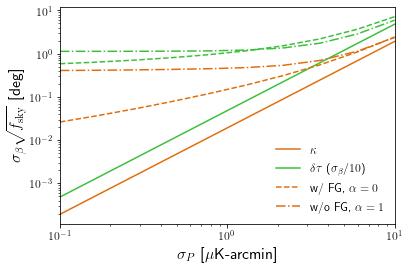

In [17]:
pl.plot_1dstyle(usetex=True,xmin=sigmas[0],xmax=sigmas[-1])
xlabel(r'$\sigma_P$ [$\mu$K-arcmin]')
ylabel(r'$\sigma_\beta\sqrt{f_{\rm sky}}$ [deg]')
loglog(sigmas,sigma_kinp,label=r'$\kappa$',color=cr[1])
loglog(sigmas,sigma_amp*1e-1,label=r'$\delta\tau$ ($\sigma_\beta/10$)',color=cr[2])
loglog(sigmas,sigma_Kinp,ls='--',color=cr[1],label=r'w/ FG, $\alpha=0$')
loglog(sigmas,sigma_Amp*1e-1,ls='--',color=cr[2])
loglog(sigmas,sigma_Kinp0,ls='-.',color=cr[1],label=r'w/o FG, $\alpha=1$')
loglog(sigmas,sigma_Amp0*1e-1,ls='-.',color=cr[2])
legend()
savefig('fig_const_reion_t'+str(theta).replace('.','p')+'_lmax'+str(rlmax)+'_ideal.pdf')